In [1]:
%run __init__.py
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from aper_phot import *
from cr2others import *

In [ ]:
# do photometry for initial regions -> cr
def print_aper_phot(method, filt):
    if filt == 'uw1':
        src_count = 53894.58
        src_count_err = 232.152
        src_pixel = 1364
        exposure = 8204.588239698116
        if method == 'annulus':
            bg_bri = 38.2686
            bg_bri_err = 0.070691
        elif method == 'single':
            bg_bri = 38.5936
            bg_bri_err = 0.168209
        elif method == 'mean':
            bg_bri_w = 38.0478
            bg_bri_w_err = 0.167016
            bg_bri_y = 38.2495
            bg_bri_y_err = 0.167458
            bg_bri_r = 38.3052
            bg_bri_r_err = 0.16758
            bg_bri_err = np.sqrt(bg_bri_w_err**2+
                             bg_bri_y_err**2+
                             bg_bri_r_err**2)/3.
            bg_bri = (bg_bri_w + bg_bri_y + bg_bri_r)/3.
    elif filt == 'v':
        src_count = 222300.59
        src_count_err = 471.488
        src_pixel = 1364
        exposure = 3099.1212399362225
        if method == 'annulus':
            bg_bri = 158.389
            bg_bri_err = 0.171248
        elif method == 'single':
            bg_bri = 159.07
            bg_bri_err = 0.341497
        elif method == 'mean':
            bg_bri_w = 158.038
            bg_bri_w_err = 0.340387
            bg_bri_y = 159.274
            bg_bri_y_err = 0.341716
            bg_bri_r = 157.915
            bg_bri_r_err = 0.340255
            bg_bri_err = np.sqrt(bg_bri_w_err**2+
                             bg_bri_y_err**2+
                             bg_bri_r_err**2)/3.
            bg_bri = (bg_bri_w + bg_bri_y + bg_bri_r)/3.
    net_cr, net_cr_err, snr = aper_phot(src_count, src_pixel, bg_bri, exposure, src_count_err, bg_bri_err)
    return net_cr, net_cr_err, snr

# return: cr, cr error, snr; mag, mag error
for filt_value in ['uw1', 'v']:
    print(filt_value)
    
    print('annulus: ')
    cr, cr_err, snr = print_aper_phot('annulus', filt_value)
    print(cr, cr_err, snr)
    print(cr2mag(cr, cr_err, filt_value))

    print('single: ')
    cr, cr_err, snr = print_aper_phot('single', filt_value)
    print(cr, cr_err, snr)
    print(cr2mag(cr, cr_err, filt_value))

    print('mean: ')
    cr, cr_err, snr = print_aper_phot('mean', filt_value)
    print(cr, cr_err, snr)
    print(cr2mag(cr, cr_err, filt_value))

In [2]:
# do photometry for new regions -> cr
def print_aper_phot_new(filt):
    if filt == 'uw1':
        img_name_uw1 = 'stacked_img_uw1.fits'
        src_center_uw1 = (1002.3406603987888,1002.4841259027182)
        src_r_uw1 = 13.0
        bg_center_uw1 = [(1078.312, 1047.9472), (867.49601, 970.18721), (964.26401, 1066.9552)]
        bg_r_uw1 = [50, 50, 50]
        cr, snr, mag = aper_phot_multi(img_name_uw1, 'uw1', src_center_uw1, src_r_uw1, bg_center_uw1, bg_r_uw1)
        cr_err = cr/snr
    elif filt == 'v':
        img_name_uvv = 'stacked_img_uvv.fits'
        src_center_uvv = (1002.3406603987888,1002.4841259027182)
        src_r_uvv = 15.0
        bg_center_uvv = [(1053.4288, 1009.2016), (1007.656, 952.32321), (952.69199, 985.3512)]
        bg_r_uvv = [30, 30, 30]
        cr, snr, mag = aper_phot_multi(img_name_uvv, 'v', src_center_uvv, src_r_uvv, bg_center_uvv, bg_r_uvv)
        cr_err = cr/snr
    return cr, cr_err, snr, mag

In [5]:
# calculate solar mag, sb and 'equivalent flux' from spectra
# return: mag, sb, mean flux
print(mag_sb_flux_from_spec('sun_ref_colina96.asc.txt', 'uw1'))
print(mag_sb_flux_from_spec('sun_ref_colina96.asc.txt', 'v'))
print(mag_sb_flux_from_spec('sun_ref_colina96.asc.txt', 'b'))
print('transferred V:-26.754918679528174  vs Literature:-26.74 ')

(6.637939828681728e+16, -24.5650832782901, 19780.39689548868, 19780.39689548868)
(7.166794875915342e+17, -26.748312436270496, 143844.02327500924, 143844.02327500924)
(1.2180428025375892e+18, -26.104156374640482, 156762.10868658774, 156762.10868658774)
transferred V:-26.754918679528174  vs Literature:-26.74 


In [3]:
# -> beta
# ??flux: ∫flux(λ)Aeff(λ)dλ/∫Aeff(λ)dλ
sb_sun_uw1 = 28703.772459088963
sb_sun_v = 58756.33809889044
equi_flux_uw1 = 25.748757806560384
equi_flux_v = 186.8160944771781
sb_x = sb_sun_uw1/sb_sun_v
equi_flux_x = equi_flux_uw1/equi_flux_v
print(sb_x, equi_flux_x)

# mean flux density: ∫flux(λ)Aeff(λ)λdλ/∫Aeff(λ)λdλ
sb_sun_uw1 = 28703.772459088963
sb_sun_v = 58756.33809889044
equi_flux_uw1 = 30.894183606283132
equi_flux_v = 186.78878481058857
sb_x = sb_sun_uw1/sb_sun_v
equi_flux_x = equi_flux_uw1/equi_flux_v
print(sb_x, equi_flux_x)

0.4885221473601502 0.13782944065189157
0.4885221473601502 0.16539635202194336


In [4]:
# OH = alpha*(UW1 - beta*V), but save alpha now
def cr2OH():
    # beta
    sun_cr_uw1, sun_mag_uw1, sun_sb_uw1, sun_flux_uw1 = mag_sb_flux_from_spec('sun_ref_colina96.asc.txt', 'uw1')
    sun_cr_v, sun_mag_v, sun_sb_v, sun_flux_v = mag_sb_flux_from_spec('sun_ref_colina96.asc.txt', 'v')
    beta_flux = sun_flux_uw1/sun_flux_v
    beta_cr = sun_cr_uw1/sun_cr_v
    print('beta_flux: '+str(beta_flux))
    print('beta_cr: '+str(beta_cr)+' pred: 0.09386768658763633')
    # comet photometry
    cr_uw1, cr_err_uw1, snr_uw1, mag_uw1 = print_aper_phot_new('uw1')
    cr_v, cr_err_v, snr_v, mag_v = print_aper_phot_new('v')
    flux_uw1, flux_err_uw1 = cr2flux(cr_uw1, cr_err_uw1, 'uw1')
    flux_v, flux_err_v = cr2flux(cr_v, cr_err_v, 'v')
    print('cr_uw1: '+str(cr_uw1)+' flux_uw1: '+str(flux_uw1))
    print('cr_v: '+str(cr_v)+' flux_uw1: '+str(flux_v))
    # calculate OH
    alpha = 1.
    OH_flux = alpha*(flux_uw1 - beta_flux*flux_v)
    OH_cr = alpha*(cr_uw1 - beta_cr*cr_v)
    return OH_flux, OH_cr

get_OH = cr2OH()
print(' ')
print('OH_flux: '+str(get_OH[0]))
print('OH_cr: '+str(get_OH[1]))

beta_flux: 0.1375128173220752
beta_cr: 0.09262075926003019 pred: 0.09386768658763633
cr_uw1: 0.16002345185905942 flux_uw1: 4.7685388419481116e-14
cr_v: 1.7676817492487165 flux_uw1: 3.547896362099607e-13
 
OH_flux: -1.1027340124247262e-15
OH_cr: -0.0037005738864550053


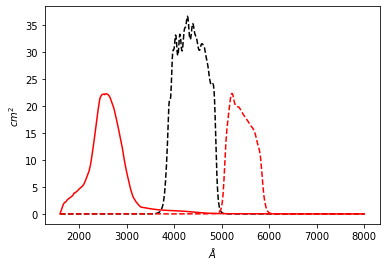

In [8]:
def how_does_arf_look_like():
    # load b
    ea_path = get_path('../data/auxil/arf_'+'b'+'.fits')
    ea_data = fits.open(ea_path)[1].data
    ea_wave_b = (ea_data['WAVE_MIN']+ea_data['WAVE_MAX'])/2. 
    ea_area_b = ea_data['SPECRESP']
    # load v
    ea_path = get_path('../data/auxil/arf_'+'v'+'.fits')
    ea_data = fits.open(ea_path)[1].data
    ea_wave_v = (ea_data['WAVE_MIN']+ea_data['WAVE_MAX'])/2. 
    ea_area_v = ea_data['SPECRESP']
    # load uw1
    ea_path = get_path('../data/auxil/arf_'+'uw1'+'.fits')
    ea_data = fits.open(ea_path)[1].data
    ea_wave_uw1 = (ea_data['WAVE_MIN']+ea_data['WAVE_MAX'])/2. 
    ea_area_uw1 = ea_data['SPECRESP']
    # plot
    plt.plot(ea_wave_b, ea_area_b, 'k--', MarkerSize=1)
    plt.plot(ea_wave_v, ea_area_v, 'r--', MarkerSize=1)
    plt.plot(ea_wave_uw1, ea_area_uw1, 'r-', MarkerSize=1)
    plt.xlabel(r'$\AA$')
    plt.ylabel(r'$cm^2$')
    plt.show()
how_does_arf_look_like()